# Text mining

En esta notebook vamos a ver un ejemplo básico de **text minning aplicado a unos cuentos de Gabriel García Márquez** que están disponibles en internet. El objetivo de text mining es extraer información útil de una base de datos de texto (corpus). El corpus que veremos aquí ésta compuesto por los funerales de la Mamá Grande es una colección de ocho cuentos del escritor colombiano Gabriel García Márquez.

Vamos a basarnos en este [tutorial](https://www.aprendemachinelearning.com/ejercicio-nlp-cuentos-de-hernan-casciari-python-espanol/) donde la primera parte se trataba de **scrapear** la página para obtener los textos. Se pueden adquirir [aquí](https://www.literatura.us/garciamarquez/) junto a otros contenidos super interesantes. 

La idea entonces es tratar de ver "**que tenía Gabriel García Márques en su cabeza**" cuando escribió estos cuentos. Los cuentos fueron escritos entre 1959 y 1962 en Colombia, Venezuela y México.

## 1. Scrapear

In [1]:
#Importamos las librerías a utilizar 
import requests # Realizar peticiones al servidor
from bs4 import BeautifulSoup as BS #Extrae, proporciona métodos y herramientas para procesar páginas web de manera más sencilla
import pickle
import pandas as pd
pd.set_option('max_colwidth',150) # para que las columnas del dataframe muestren hasta 150 caracteres

Comenzemos haciendo el request, que reliza una solicitud HTTP al sitio web

In [2]:
#Los sitios o url de las páginas donde están los cuentos 
urls=[
      'https://www.literatura.us/garciamarquez/siesta.html',
      'https://www.literatura.us/garciamarquez/undia.html',
      'https://www.literatura.us/garciamarquez/eneste.html',
      'https://www.literatura.us/garciamarquez/baltazar.html',
      'https://www.literatura.us/garciamarquez/montiel.html',
      'https://www.literatura.us/garciamarquez/sabado.html',
      'https://www.literatura.us/garciamarquez/rosas.html',
      'https://www.literatura.us/garciamarquez/mamag.html',
      'https://www.literatura.us/garciamarquez/coronel.html',
      'https://www.literatura.us/garciamarquez/soledad1.html',
      'https://www.literatura.us/garciamarquez/soledad2.html'


    ]

#Títulos de los cuentos 
titulos_cuentos=[
                 'La siesta del martes',
                 'Un día de estos',
                 'En este pueblo no hay ladrones',               
                 'La prodigiosa tarde de Baltazar',
                 'La viuda de Montiel',
                 'Un día después del sábado',
                 'Rosas artificiales',
                 'Los funerales de la Mamá Grande',
                 'El coronel no tiene quien le escriba',
                 'Cien años de soledad_1',
                 'Cien años de soledad_2'
                ]
                

In [3]:
texts = {}

for url, titulos in zip(urls, titulos_cuentos):
    # Hacemos la petición HTTP
    response=requests.get(url)
    
    # soup es un objeto manipulable creado a partir del contenido de la página y BeautifulSoup
    soup = BS(response.content)

    # Extraemos el elemento p de la  clase = "MsoNormal" dónde se encuentra el cuento 
    paragraph= soup.find(attrs = {"class": "MsoNormal"}).text

    # Palabras a quitar del párrafo
    palabras_remplazar='Literatura\n.us\nMapa de la biblioteca | Aviso Legal | Quiénes Somos | Contactar\n      \xa0\n\n\n\n'

    # Quitamos palabras de publicidad que están en párrafo 
    paragraphs = paragraph.replace(palabras_remplazar, "")
    
    # Iteramos para todo párrafo y vemos el texto contenido
    # Podemos hacer una lista y concatenar todo con un salto de línea
    # paragraphs= '\n \n'.join(paragraphs)

    # Adicionamos cada texto al diccionario texts, y lo relacionamos con su título 
    texts[titulos]=paragraphs




In [4]:
#Nuevo diccionario pasando los valores de las llaves a listas
data_combined = {key: [value] for (key, value) in texts.items()}

# Creamos el dataframe
data_df = pd.DataFrame.from_dict(data_combined).transpose() # transponemos para que tenga las dimensiones correctas
data_df.columns = ['Cuentos']                            # renombramos las columnas
print(data_df)

                                                                                                                                                                                    Cuentos
La siesta del martes                           El tren salió del trepidante corredor de rocas bermejas, penetró en las plantaciones de banano, simétricas e interminables, y el aire se ...
Un día de estos                                El lunes amaneció\r\ntibio y sin lluvia. Don Aurelio Escovar, dentista\r\nsin título y buen madrugador, abrió su gabinete a\r\nlas seis. ...
En este pueblo no hay ladrones                 Dámaso regresó al cuarto con los primeros gallos. Ana, su mujer, encinta de seis meses, lo esperaba sentada en la cama, vestida y con zap...
La prodigiosa tarde de Baltazar                La jaula estaba terminada. Baltazar\r\n      la colgó en el alero, por la fuerza de la costumbre, y cuando acabó de\r\n      almorzar ya ...
La viuda de Montiel                            Cuando murió 

## 2. Limpieza de datos

Ahora aplicaremos algunos de los filtros de limpieza que se suelen usar para poder tratar el texto:

* Pasar texto a minúsculas
* Quitar signos de puntuación (interrogación, y otros símbolos)
* Quitar espacios extra, cambio de carro, tabulaciones

Para eso vamos a ultilizar las librerías "re" y "string"

In [5]:
import re       # librería de expresiones regulares
import string   # librería de cadena de caracteres

In [6]:
# Defino una función que recibe un texto y devuelve el mismo texto sin singnos,
def clean_text_round1(text):
    # pasa las mayúsculas del texto a minúsculas
    text = text.lower() 

    # reemplaza texto entre corchetes por espacio en blanco.. ¿ y \% no se..
    text = re.sub(r'\[.*?¿\]\%', ' ', text)

    #Eliminar tanto los espacios en blanco no rompibles ("\xa0"), saltos de línea y carácter "\xad"
    text=re.sub(r'[\xa0\n¿!]', '', text) 

    #Eliminar el carácter "\xad"
    text=re.sub(r'[\xad]', '', text) 

    #Eliminar los retornos de carro ("\r") 
    text=re.sub(r'[\r]', ' ', text)  

    # Eliminar guiones (-), en dash (–) y em dash (—)
    text = re.sub(r'[-\u2013\u2014]', '', text) 

    text=re.sub(r'<(?!\/?[a-zA-Z])', '', text)

    # reemplaza singnos de puntuación por espacio en blanco.. %s -> \S+ es cualquier caracter que no sea un espacio en blanco
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 

    # Sacamos comillas, los puntos suspensivos, <<, >>
    text = re.sub('[‘’“”…«»]', '', text)

    # remueve palabras que contienen números.
    text = re.sub('\w*\d\w*', ' ', text)        

    return text

# Defino una función anónima que al pasarle un argumento devuelve el resultado de aplicarle la función anterior a este mismo argumento
round1 = lambda x: clean_text_round1(x)

# Dataframe que resulta de aplicarle a las columnas la función de limpieza
data_clean = pd.DataFrame(data_df.Cuentos.apply(round1))

#Lo pickleamos y guardamos 
data_clean.to_pickle(r"C:\Users\HP\Documents\Ciencia De Datos\Análisis de los funerales de la mamá grande\corpus.pkl")

In [7]:
# Defino una función que recibe un texto y devuelve el mismo texto sin singnos,
def clean_text_round1(text):
    # pasa las mayúsculas del texto a minúsculas
    text = text.lower() 

    # reemplaza texto entre corchetes por espacio en blanco.. ¿ y \% no se..
    text = re.sub(r'\[.*?¿\]\%', ' ', text)

    #Eliminar tanto los espacios en blanco no rompibles ("\xa0"), saltos de línea y carácter "\xad"
    text=re.sub(r'[\xa0\n¿!]', '', text) 

    #Eliminar el carácter "\xad"
    text=re.sub(r'[\xad]', '', text) 

    #Eliminar los retornos de carro ("\r") 
    text=re.sub(r'[\r]', ' ', text)  

    # # Eliminar guiones (-), en dash (–) y em dash (—)
    # text = re.sub(r'[-\u2013\u2014]', '', text) 

    # text=re.sub(r'<(?!\/?[a-zA-Z])', '', text)

    # # reemplaza singnos de puntuación por espacio en blanco.. %s -> \S+ es cualquier caracter que no sea un espacio en blanco
    # #text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 

    # # Sacamos comillas, los puntos suspensivos, <<, >>
    # text = re.sub('[‘’“”…«»]', '', text)

    # # remueve palabras que contienen números.
    # text = re.sub('\w*\d\w*', ' ', text)        

    return text

# Defino una función anónima que al pasarle un argumento devuelve el resultado de aplicarle la función anterior a este mismo argumento
round1 = lambda x: clean_text_round1(x)

# Dataframe que resulta de aplicarle a las columnas la función de limpieza
data_clean_ = pd.DataFrame(data_df.Cuentos.apply(round1))

#Lo pickleamos y guardamos 
data_clean_.to_pickle(r"C:\Users\HP\Documents\Ciencia De Datos\Análisis de los funerales de la mamá grande\data_clean_sin_puntucions.pkl")

In [8]:
data_clean.Cuentos[9]

'muchos años después frente al pelotón de fusilamiento el coronel aureliano buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas blancas y enormes como huevos prehistóricos el mundo era tan reciente que muchas cosas carecían de nombre y para mencionarlas había que señalarlas con el dedo todos los años por el mes de marzo una familia de gitanos desarrapados plantaba su carpa cerca de la aldea y con un grande alboroto de pitos y timbales daba a conocer los nuevos inventos primero llevaron el imán un gitano corpulento de barba montaraz y manos de gorrión que se presentó con el nombre de melquíades hizo una truculenta demostración pública de lo que él mismo llamaba la octava maravilla de los sabios alquimistas de macedonia fue de casa en casa arrastrando dos lingotes metálicos y todo

### Y creamos nuestro “Bag of Words”

A partir del dataset que limpiamos, creamos y contamos las palabras:

In [9]:
#Vamos a crear la matriz de documentos-terminos usando CountVectorizer, y excluiremos las stop words del español
from sklearn.feature_extraction.text import CountVectorizer

# Cargamos del paquete nltk las stopwords del españiol a la lista "lines"
import nltk

In [10]:
nltk.download('stopwords') # hay que descargar este modulo en particular

lines = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
print(lines)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

Ahora vamos a crear la matriz de terminos-documentos. Para ello hay una funcion de scikit-learn que si le das una secuencia de items de tipo string o byte hace exactamente eso.

In [12]:
# Inicializo el modelo excluyendo stopwords
cv = CountVectorizer(stop_words=lines)

# Ajustamos el modelo y lo aplicamos al texto de nuestro dataframe generando una matriz esparsa
data_cv = cv.fit_transform(data_clean.Cuentos)

# Nos creamos un dataframe transformando a densa la matriz generada recien que tiene como columnas las palabras (terminos) y como filas los documentos
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())

# Le asignamos los indices del dataframe anterior
data_dtm.index = data_clean.index

In [13]:
data_dtm

,abajo,abalorios,abandonaba,abandonaban,abandonada,abandonado,abandonados,abandonar,abandonarlo,abandonaron,...,úlceras,última,últimas,último,últimos,única,único,únicos,úrsula,útiles
La siesta del martes,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,2,0,0
Un día de estos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
En este pueblo no hay ladrones,0,0,2,0,0,1,0,1,1,0,...,0,2,0,1,0,0,1,0,0,0
La prodigiosa tarde de Baltazar,0,0,0,0,0,0,0,2,0,0,...,0,0,0,1,0,0,1,0,10,0
La viuda de Montiel,0,0,1,0,0,0,0,2,0,0,...,0,0,0,2,0,1,4,0,0,0
Un día después del sábado,0,0,0,0,0,0,0,1,0,0,...,0,3,1,3,5,1,3,0,0,0
Rosas artificiales,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Los funerales de la Mamá Grande,0,0,0,1,1,0,0,0,0,0,...,0,4,2,2,2,3,3,0,0,1
El coronel no tiene quien le escriba,2,0,1,0,0,0,0,2,0,1,...,0,6,3,4,2,2,5,1,0,0
Cien años de soledad_1,0,0,0,0,0,2,1,2,0,1,...,1,0,0,4,0,1,3,1,25,0


----
Vemos que hay palabras que no están en el idioma espaniol. Dependiendo la información que queramos obtener con estos datos entonces tal vez es conveniente filtrar este tipo de palabras. Como lo que vamos a analizar en esta notebook es el vocabulario del escritor, en particular el numero de palabras unicas, entonces las vamos a dejar.

**nltk** tiene [corpus](https://www.nltk.org/book/ch02.html) que se pueden cargar y utilizar para filtrar palabras de distintos idiomas o nombres propios.

```
# Ejemplo de palabras en ingles
english_vocab = set(w.lower() for w in nltk.corpus.words.words()) 
```

Ojo! que hay palabras que estan en ingles pero no estan en un *diccionario*, como expresiones tipicas de chats, algunos nombres propios o abreviaturas. Entonces hay que tener cuidado cuando pasamos de mayusculas a minusculas. Si las queremos filtrar entonces tenemos que ser cuidadosxs con el corpus que usamos.

## Guardamos los datos generados 

In [14]:
data_dtm.to_pickle(r"C:\Users\HP\Documents\Ciencia De Datos\Análisis de los funerales de la mamá grande\dtm.pkl")
data_clean.to_pickle(r"C:\Users\HP\Documents\Ciencia De Datos\Análisis de los funerales de la mamá grande\data_clean.pkl")
pickle.dump(cv, open(r"C:\Users\HP\Documents\Ciencia De Datos\Análisis de los funerales de la mamá grande\cv.pkl", "wb"))

## Análsis exploratorios 

In [15]:
# Cargamos el dataframe que generamos previamente
data = pd.read_pickle(r"C:\Users\HP\Documents\Ciencia De Datos\Análisis de los funerales de la mamá grande\dtm.pkl")

# Transponemos para tener una matriz de terminosXdocumentos
data = data.transpose()

data.head()

,La siesta del martes,Un día de estos,En este pueblo no hay ladrones,La prodigiosa tarde de Baltazar,La viuda de Montiel,Un día después del sábado,Rosas artificiales,Los funerales de la Mamá Grande,El coronel no tiene quien le escriba,Cien años de soledad_1,Cien años de soledad_2
abajo,0,0,0,0,0,0,0,0,2,0,0
abalorios,0,0,0,0,0,0,0,0,0,0,3
abandonaba,0,0,2,0,1,0,0,0,1,0,0
abandonaban,0,0,0,0,0,0,0,1,0,0,0
abandonada,1,0,0,0,0,0,0,1,0,0,0


###  Palabras más usadas por año

veamos las palabras más usadas cada año:

In [16]:
# Creo un diccionario
top_dict = {}

# Por cada año
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30) # Ordeno las filas en forma decreciente y me quedo con las 30 palabras mas usadas
    top_dict[c]= list(zip(top.index, top.values))       # le asigno el año a la key del diccionario y como valor una tupla con la palabra y su frecuencia

print(top_dict)
print("\n")

# Imprimo las 15 palabras mas frecuentes por año
for anio, top_words in top_dict.items():
    print(anio) # imprimo la key
    print(', '.join([word for word, count in top_words[0:14]])) # imprimo las palabras en orden decreciente segun frecuencia y separadas con espacio y coma

{'La siesta del martes': [('mujer', 39), ('niña', 22), ('dijo', 21), ('puerta', 18), ('padre', 11), ('tren', 11), ('madre', 9), ('calle', 9), ('pueblo', 9), ('después', 8), ('flores', 8), ('miró', 7), ('sacerdote', 7), ('volvió', 7), ('casa', 6), ('ventanilla', 6), ('calor', 6), ('cabeza', 6), ('sólo', 6), ('lado', 6), ('red', 6), ('metálica', 6), ('fondo', 5), ('vez', 5), ('voz', 5), ('centeno', 5), ('acabó', 5), ('dos', 5), ('sala', 4), ('cartera', 4)], 'Un día de estos': [('alcalde', 13), ('dijo', 12), ('dentista', 11), ('fresa', 5), ('mesa', 5), ('sintió', 5), ('abrió', 4), ('sacó', 4), ('ojos', 4), ('hizo', 4), ('vio', 4), ('silla', 4), ('muela', 4), ('sillón', 3), ('dice', 3), ('gaveta', 3), ('instrumentos', 3), ('después', 3), ('lágrimas', 3), ('puso', 3), ('puerta', 3), ('apresurarse', 2), ('movió', 2), ('pulir', 2), ('siguió', 2), ('noches', 2), ('ventana', 2), ('cinco', 2), ('cerró', 2), ('mirar', 2)], 'En este pueblo no hay ladrones': [('dámaso', 91), ('dijo', 90), ('ana', 4

Vemos que hay nombres propios, numeros escrito con letras y algunas palabras que no nos da informacion por si solo. Filtramos estas palabras. 

Tambien vemos que hay palabras que se repiten dentro de las mas frecuentes de cada cuento en todos los *cuentos* que tambien queremos filtrar

### Agregamos Stop Words

Vamos a unir las 12 listas de palabras mas usadas en un nuevo ranking y de esas, tomaremos las "mas usadas" para agregar al listado de Stop Words. Es decir, si una palabra aparecio en el top 30 mas de la mitad de las veces (en 7 anios o mas) entonces la considero una stop word.

Vamos a usar la funcion Counter de la libreria collections que dada una lista de strings nos devuelve la cantidad de repeticiones de cada elemento

In [17]:
from collections import Counter
 
# Generamos una lista con las 30 palabras mas usadas de cada anio
words = []
for anio in data.columns:
    top = [word for (word, count) in top_dict[anio]] # armo una lista quedandome solo con las palabras del diccionario que creamos antes
    for t in top:
        words.append(t)                              # agrego cada palabra a la lista vacia, por separado

# usando el metodo .most_common() obtengo las palabras mas usadas, y la cantidad de veces que fue agregada a la lista words
print(Counter(words).most_common())

# Creo una lista de nuevas stop words considerando como stop words a palabras que recibieron mas de la mitad de las cuentas posibles (12 anios)
add_stop_words = [word for word, count in Counter(words).most_common() if count > 4]
print(add_stop_words)

[('después', 9), ('dijo', 8), ('casa', 8), ('vez', 8), ('dos', 8), ('entonces', 8), ('puerta', 6), ('años', 6), ('padre', 5), ('mientras', 5), ('mujer', 4), ('sólo', 4), ('vio', 4), ('hacia', 4), ('josé', 4), ('si', 4), ('madre', 3), ('pueblo', 3), ('volvió', 3), ('cabeza', 3), ('sintió', 3), ('ojos', 3), ('hizo', 3), ('puso', 3), ('dio', 3), ('úrsula', 3), ('mundo', 3), ('tan', 3), ('tiempo', 3), ('calor', 2), ('sala', 2), ('alcalde', 2), ('mesa', 2), ('siguió', 2), ('cuarto', 2), ('don', 2), ('cama', 2), ('noche', 2), ('hombre', 2), ('frente', 2), ('montiel', 2), ('médico', 2), ('hacer', 2), ('esposa', 2), ('pesos', 2), ('grande', 2), ('vida', 2), ('luego', 2), ('nunca', 2), ('siempre', 2), ('muerto', 2), ('primera', 2), ('corredor', 2), ('antonio', 2), ('isabel', 2), ('aquella', 2), ('macondo', 2), ('tarde', 2), ('días', 2), ('mismo', 2), ('buendía', 2), ('arcadio', 2), ('aldea', 2), ('toda', 2), ('niña', 1), ('tren', 1), ('calle', 1), ('flores', 1), ('miró', 1), ('sacerdote', 1), (

### Actualizamos nuestra Bag of Words

Ahora quitaremos las Stop words de nuestro dataset. Usaremos el listado de stop words en espaniol de nltk, el que generamos recién y uno adicional que tiene en cuenta las observaciones que palabras fueron las mas frecuentes 
Ojo! esto puede parecer **arbitrario** y en parte lo es!

Entonces volveremos a cargar los datos limpios y cuando filtramos las stop words agregamos estas dos listas nuevas

In [18]:
#from sklearn.feature_extraction import text 
 
# Leemos los datos limpios
data_clean = pd.read_pickle(r"C:\Users\HP\Documents\Ciencia De Datos\Análisis de los funerales de la mamá grande\data_clean.pkl")
 
# Agregamos la lista de stop words "lines" las nuevas stop words
for pal in add_stop_words:
    lines.append(pal)

# Creamos la lista que tiene algunos nombres propios que aparecieron entre las palabras mas frecuentes y otro tipo de palabras
more_stop_words=['después', 'dijo', 'vez','dos', 'entonces','mientras','hacia','si','años','cabeza','hizo','puerta','volvió', 'mesa','puso', 'hacia','tan']
for pal in more_stop_words:
    lines.append(pal)
 
# Recreamos la matriz de documentos y terminos pero ustando la nueva lista "mejorada" de stopwords
cv = CountVectorizer(stop_words=lines)
data_cv = cv.fit_transform(data_clean.Cuentos)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index
 
# Lo guardamos en formato pickle
pickle.dump(cv, open(r"C:\Users\HP\Documents\Ciencia De Datos\Análisis de los funerales de la mamá grande\cv_stop.pkl","wb"))
data_stop.to_pickle(r"C:\Users\HP\Documents\Ciencia De Datos\Análisis de los funerales de la mamá grande\dtm_stop.pkl")

### Nube de Palabras

Queremos ver “que tenía Gabriel García Márquez en su cabeza” entre 1859 y 1962 en sus cuentos usando WordClouds.

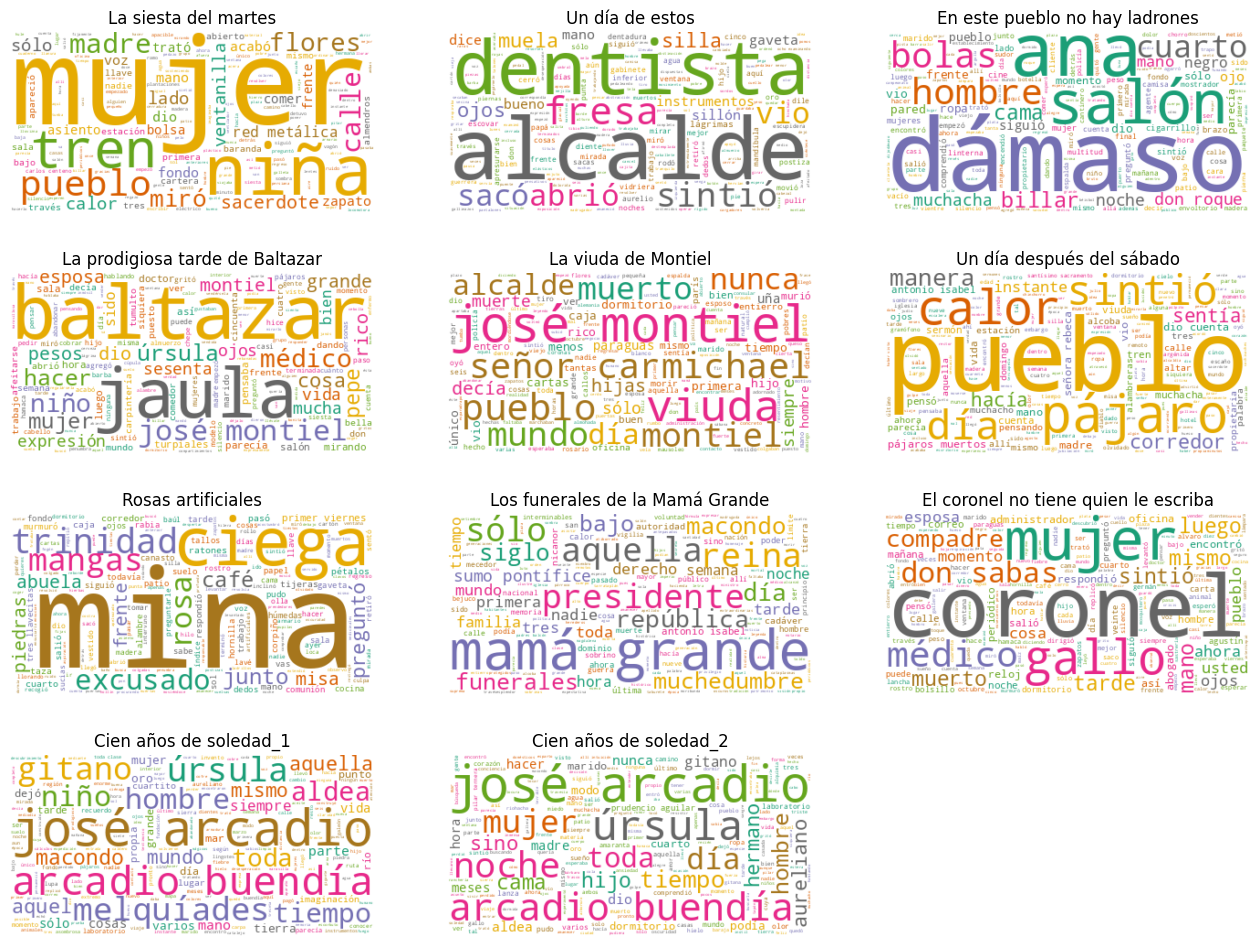

In [19]:

from wordcloud import WordCloud # importo la funcion WordCloud
import matplotlib.pyplot as plt

# Creo el objeto WordCloud con determinados parametros y utilizando nuestra lista de stopwords
wc = WordCloud(stopwords=lines, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
 
plt.rcParams['figure.figsize'] = [16,12] # tamanio de los plots
 
# Para cada anio creo un WC
for index, anio in enumerate(data.columns):
    wc.generate(data_clean.Cuentos[anio])  # aca le pido que genere los WC a partir del texto de cada anio
    plt.subplot(4, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")  
    plt.axis("off")
    plt.title(titulos_cuentos[index])
plt.show()

Siguiendo este analisis interpretativo se nota en estas wordclouds algunos topicos importantes que definen su personalidad. Es un escritor que le gusta mucho escribir sobre su vida, por lo que no es de extraniarse que "libro",  aparezcan o palabras familiares niño, hermano, mujer, pueblo.

Aparecen enbueltas muchas las historia de colombia, constubres y cultura nacional. El calor sofocante de sus padres y acestros.

## Estadísticas de Palabras por año

Ahora sacaremos algunas estadísticas de palabras únicas por año (el tamaño del vocabulario empleado) y el promedio de palabras por artículo

In [20]:
# Encontraremos las palabras unicas por anio identificando los elementos non-zero en la matriz de documentos y terminos
unique_list = []
for anio in data.columns:
    uniques = data[anio].to_numpy().nonzero()[0].size # tengo que transformar a un array para aplicar la funcion nonzero
    unique_list.append(uniques)
 
# Creo un nuevo dataframe con el numero de palabras unicas por anio
data_words = pd.DataFrame(list(zip(titulos_cuentos, unique_list)), columns=['Anio', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
#data_unique_sort = data_words # sin ordenar
print(data_unique_sort)

                                    Anio  unique_words
1                        Un día de estos           322
6                     Rosas artificiales           488
4                    La viuda de Montiel           744
3        La prodigiosa tarde de Baltazar           758
0                   La siesta del martes           760
10                Cien años de soledad_2          1754
9                 Cien años de soledad_1          1892
7        Los funerales de la Mamá Grande          1970
5              Un día después del sábado          2003
2         En este pueblo no hay ladrones          2147
8   El coronel no tiene quien le escriba          3317


In [21]:
# El numero de post por anio, esto es dato
#posts_per_year = [50, 27, 18, 50, 42, 22, 50, 33, 31, 17, 33, 13]

# Encuentro el numero total de palabras por anio
total_list = []
for anio in data.columns:
    totals = sum(data[anio])
    total_list.append(totals)
    
# Agrego las columnas al dataframe
data_words['total_words'] = total_list
#data_words['posts_per_year'] = posts_per_year
#data_words['words_per_posts'] = data_words['total_words'] / data_words['posts_per_year']
 
data_wpm_sort = data_words #sin ordenar
print(data_wpm_sort)

                                    Anio  unique_words  total_words
0                   La siesta del martes           760         1218
1                        Un día de estos           322          454
2         En este pueblo no hay ladrones          2147         4103
3        La prodigiosa tarde de Baltazar           758         1246
4                    La viuda de Montiel           744         1117
5              Un día después del sábado          2003         3892
6                     Rosas artificiales           488          852
7        Los funerales de la Mamá Grande          1970         2927
8   El coronel no tiene quien le escriba          3317         8919
9                 Cien años de soledad_1          1892         3048
10                Cien años de soledad_2          1754         3072


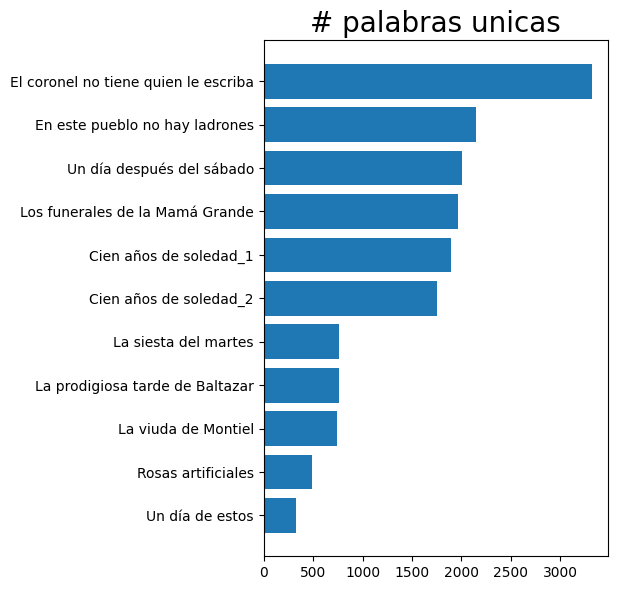

In [22]:
import numpy as np
plt.rcParams['figure.figsize'] = [16, 6]
 
y_pos = np.arange(len(data_words))
 
# plt.subplot(1, 3, 1)
# plt.barh(y_pos,posts_per_year, align='center')
# plt.yticks(y_pos, anios)
# plt.title('# de Posts', fontsize=20)
 
 
plt.subplot(1, 3, 2)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.Anio)
plt.title('# palabras unicas', fontsize=20)
 
# plt.subplot(1, 3, 3)
# plt.barh(y_pos, data_wpm_sort.words_per_posts, align='center')
# plt.yticks(y_pos, data_wpm_sort.Anio)
# plt.title('# palabras por post', fontsize=20)
 
plt.tight_layout()
plt.show()